<a href="https://colab.research.google.com/github/Mehdimakoul/ML_2025/blob/main/Projet_ML_2025_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>





# **Chargement des données :**



In [15]:
import pandas as pd
import gdown
url = 'https://drive.google.com/uc?id=16RaR8rtlPI2AbzE71PCm39KPwdAhnfc8'
output = '/content/DB.txt'
gdown.download(url, output, quiet=False)

Downloading...
From (original): https://drive.google.com/uc?id=16RaR8rtlPI2AbzE71PCm39KPwdAhnfc8
From (redirected): https://drive.google.com/uc?id=16RaR8rtlPI2AbzE71PCm39KPwdAhnfc8&confirm=t&uuid=905e1d49-4669-49d4-8e35-5d99be54453d
To: /content/DB.txt

  0%|          | 0.00/986M [00:00<?, ?B/s]
  2%|▏         | 16.3M/986M [00:00<00:06, 160MB/s]
  4%|▎         | 35.1M/986M [00:00<00:05, 175MB/s]
  5%|▌         | 53.5M/986M [00:00<00:05, 178MB/s]
  8%|▊         | 75.5M/986M [00:00<00:04, 193MB/s]
 10%|▉         | 96.5M/986M [00:00<00:04, 198MB/s]
 12%|█▏        | 116M/986M [00:00<00:04, 198MB/s] 
 14%|█▍        | 136M/986M [00:00<00:06, 133MB/s]
 16%|█▋        | 160M/986M [00:00<00:05, 158MB/s]
 18%|█▊        | 179M/986M [00:01<00:05, 149MB/s]
 20%|██        | 199M/986M [00:01<00:04, 160MB/s]
 22%|██▏       | 217M/986M [00:01<00:05, 145MB/s]
 24%|██▎       | 233M/986M [00:01<00:05, 145MB/s]
 25%|██▌       | 251M/986M [00:01<00:04, 154MB/s]
 27%|██▋       | 269M/986M [00:01<00:04, 161MB/

'/content/DB.txt'

In [2]:
import pandas as pd
output = '/content/DB.txt'
data = pd.read_csv(output, delimiter=';', encoding='Utf-8')

<ipython-input-2-d675ec7616ca>:3: DtypeWarning: Columns (1,2,5,6,7,8,9,15,16,22) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(output, delimiter=';', encoding='Utf-8')


In [4]:
data.head()

,ZIBZIN,IDAvisAutorisationCheque,FlagImpaye,Montant,DateTransaction,CodeDecision,VerifianceCPT1,VerifianceCPT2,VerifianceCPT3,D2CB,...,TauxImpNb_RB,TauxImpNB_CPM,EcartNumCheq,NbrMagasin3J,DiffDateTr1,DiffDateTr2,DiffDateTr3,CA3TRetMtt,CA3TR,Heure
0,A013010004908126703060931,78643044,0,20,2017-02-01 07:32:14,1,0,0,0,551,...,"37,186667890919111","52,076033757361408",0,1,4,4,4,20,0,27134
1,A013011306908024927155000,78643045,0,20,2017-02-01 07:43:37,1,0,0,0,551,...,"48,844716275908937","52,076033757361408",1,2,"1,7976851851851852",4,4,"28,609999999999999","8,6099999999999994",27817
2,A013010002908283134592527,78643046,0,"57,640000000000001",2017-02-01 07:47:38,1,0,0,0,549,...,"73,118279569892479","52,076033757361408",0,1,4,4,4,"57,640000000000001",0,28058
3,A011010002908105209831316,78643047,0,"54,289999999999999",2017-02-01 07:48:48,0,1,1,1,267,...,"110,05692599620494","53,554233554497365",0,1,4,4,4,"54,289999999999999",0,28128
4,A013010041908000125652029,78643048,0,"26,899999999999999",2017-02-01 08:13:27,1,0,0,0,549,...,"45,36831264567185","52,076033757361408",1,1,"1,9971064814814814",4,4,"59,149999999999999","32,25",29607


In [3]:
#c onvertir la colonne  en String
data['ZIBZIN'] = data['ZIBZIN'].astype(str)

# convertir la colonne DateTransaction en date

data['DateTransaction'] = pd.to_datetime(data['DateTransaction'], errors='coerce')

# Remplacer les virgules par des points dans toutes les colonnes sauf 'ZIBZIN' et 'DateTransaction' et convertir les données en numérique
for col in data.columns:
    if col not in ['ZIBZIN', 'DateTransaction']:
        data[col] = data[col].astype(str).str.replace(',', '.').str.strip()
        data[col] = pd.to_numeric(data[col], errors='coerce')

In [6]:
data.head()

,ZIBZIN,IDAvisAutorisationCheque,FlagImpaye,Montant,DateTransaction,CodeDecision,VerifianceCPT1,VerifianceCPT2,VerifianceCPT3,D2CB,...,TauxImpNb_RB,TauxImpNB_CPM,EcartNumCheq,NbrMagasin3J,DiffDateTr1,DiffDateTr2,DiffDateTr3,CA3TRetMtt,CA3TR,Heure
0,A013010004908126703060931,78643044.0,0.0,20.00,2017-02-01 07:32:14,1.0,0.0,0.0,0.0,551.0,...,37.186668,52.076034,0.0,1.0,4.000000,4.0,4.0,20.00,0.00,27134.0
1,A013011306908024927155000,78643045.0,0.0,20.00,2017-02-01 07:43:37,1.0,0.0,0.0,0.0,551.0,...,48.844716,52.076034,1.0,2.0,1.797685,4.0,4.0,28.61,8.61,27817.0
2,A013010002908283134592527,78643046.0,0.0,57.64,2017-02-01 07:47:38,1.0,0.0,0.0,0.0,549.0,...,73.118280,52.076034,0.0,1.0,4.000000,4.0,4.0,57.64,0.00,28058.0
3,A011010002908105209831316,78643047.0,0.0,54.29,2017-02-01 07:48:48,0.0,1.0,1.0,1.0,267.0,...,110.056926,53.554234,0.0,1.0,4.000000,4.0,4.0,54.29,0.00,28128.0
4,A013010041908000125652029,78643048.0,0.0,26.90,2017-02-01 08:13:27,1.0,0.0,0.0,0.0,549.0,...,45.368313,52.076034,1.0,1.0,1.997106,4.0,4.0,59.15,32.25,29607.0


# **Analyse des données :**

In [7]:
# Nombre de lignes et colonnes dans la dataset principale
data.shape

(4646774, 23)

In [4]:
# Le pourcentage de valeurs manquantes pour chaque variable dans la table principale
((data.isna().sum(axis=0) / data.shape[0])*100).sort_values()

,0
ZIBZIN,0.000000
CA3TRetMtt,0.000022
DiffDateTr3,0.000022
DiffDateTr2,0.000022
DiffDateTr1,0.000022
NbrMagasin3J,0.000022
EcartNumCheq,0.000022
TauxImpNB_CPM,0.000022
TauxImpNb_RB,0.000022
ScoringFP3,0.000022


In [7]:
print(data[data['IDAvisAutorisationCheque'].isna()]['ZIBZIN'])

1956360    ZIBZIN
Name: ZIBZIN, dtype: object


In [5]:
data = data.dropna(subset=['IDAvisAutorisationCheque'])

In [6]:
# Afficher le pourcentage de valeurs manquantes par colonne, trié par ordre croissant
missing_values = (data.isna().sum() / data.shape[0]) * 100
print(missing_values.sort_values())

ZIBZIN                      0.0
CA3TRetMtt                  0.0
DiffDateTr3                 0.0
DiffDateTr2                 0.0
DiffDateTr1                 0.0
NbrMagasin3J                0.0
EcartNumCheq                0.0
TauxImpNB_CPM               0.0
TauxImpNb_RB                0.0
ScoringFP3                  0.0
CA3TR                       0.0
ScoringFP2                  0.0
D2CB                        0.0
VerifianceCPT3              0.0
VerifianceCPT2              0.0
VerifianceCPT1              0.0
CodeDecision                0.0
DateTransaction             0.0
Montant                     0.0
FlagImpaye                  0.0
IDAvisAutorisationCheque    0.0
ScoringFP1                  0.0
Heure                       0.0
dtype: float64


<Axes: ylabel='count'>

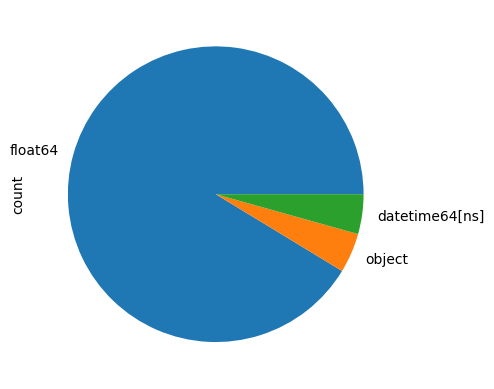

In [10]:
# Les Types de données
data.dtypes
data.dtypes.value_counts().plot.pie()

In [11]:
# Informations sur Le Dataset principale - valeur quatitatives
data.describe()

,IDAvisAutorisationCheque,FlagImpaye,Montant,DateTransaction,CodeDecision,VerifianceCPT1,VerifianceCPT2,VerifianceCPT3,D2CB,ScoringFP1,...,TauxImpNb_RB,TauxImpNB_CPM,EcartNumCheq,NbrMagasin3J,DiffDateTr1,DiffDateTr2,DiffDateTr3,CA3TRetMtt,CA3TR,Heure
count,4.646773e+06,4.646773e+06,4.646773e+06,4646773,4.646773e+06,4.646773e+06,4.646773e+06,4.646773e+06,4.646773e+06,4.646773e+06,...,4.646773e+06,4.646773e+06,4.646773e+06,4.646773e+06,4.646773e+06,4.646773e+06,4.646773e+06,4.646773e+06,4.646773e+06,4.646773e+06
mean,8.088216e+07,6.455017e-03,6.014214e+01,2017-05-18 06:35:27.977373952,2.516043e-01,2.295272e-01,2.452963e-01,2.716444e-01,3.139046e+02,2.217686e+00,...,3.912727e+01,3.850640e+01,8.480311e+03,1.036989e+00,3.873620e+00,4.166527e+00,4.199614e+00,6.730030e+01,7.158162e+00,5.248595e+04
min,7.864304e+07,0.000000e+00,1.000000e-02,2017-02-01 07:32:14,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,3.703704e-04,7.754630e-04,1.000000e-02,0.000000e+00,1.822500e+04
25%,7.946082e+07,0.000000e+00,2.598000e+01,2017-03-11 18:03:28,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,4.900000e+01,5.631127e-03,...,2.223457e+01,2.875694e+01,0.000000e+00,1.000000e+00,4.000000e+00,4.000000e+00,4.000000e+00,2.940000e+01,0.000000e+00,4.148500e+04
50%,8.029597e+07,0.000000e+00,4.412000e+01,2017-04-20 15:18:42,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,3.870000e+02,1.096892e-02,...,3.433578e+01,3.681303e+01,0.000000e+00,1.000000e+00,4.000000e+00,4.000000e+00,4.000000e+00,4.941000e+01,0.000000e+00,5.347800e+04
75%,8.217947e+07,0.000000e+00,7.304000e+01,2017-07-16 12:10:37,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,5.320000e+02,4.344551e-02,...,4.658322e+01,5.088256e+01,0.000000e+00,1.000000e+00,4.000000e+00,4.000000e+00,4.000000e+00,8.282000e+01,0.000000e+00,6.287700e+04
max,8.496640e+07,1.000000e+00,1.212600e+05,2017-11-30 22:07:13,4.000000e+00,1.600000e+01,2.600000e+01,3.200000e+01,5.510000e+02,2.049888e+04,...,1.000000e+04,1.276970e+02,9.956167e+06,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,1.212600e+05,1.560000e+04,8.195800e+04
std,1.781519e+06,8.008340e-02,1.019927e+02,NaN,4.475876e-01,4.422162e-01,4.965438e-01,5.812737e-01,2.207225e+02,2.709370e+01,...,6.011574e+01,1.673441e+01,1.982303e+05,1.920397e-01,1.059257e+00,5.171843e-01,4.242342e-01,1.114365e+02,3.860036e+01,1.187262e+04


<Figure size 300x500 with 0 Axes>

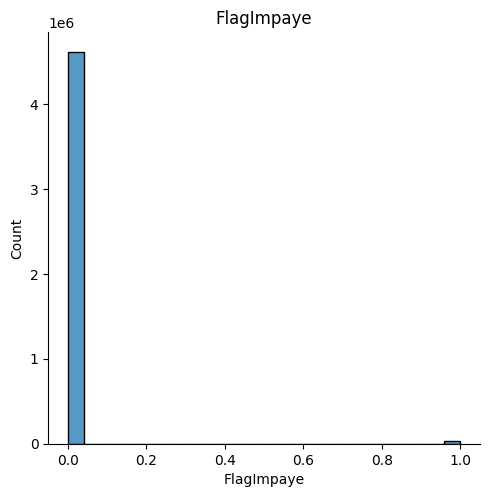

In [18]:
# Distribution de notre variable Target(cible) (FlagImpaye)
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(3,5))
sns.displot(data['FlagImpaye'])
plt.title('FlagImpaye')
plt.show()

In [13]:
# Valeurs prises par les variables categorielles
for col in data.select_dtypes('object'):
    print(f'{col :-<40} {data[col].unique()}')
    print()

ZIBZIN---------------------------------- ['A013010004908126703060931' 'A013011306908024927155000'
 'A013010002908283134592527' ... 'A049010278908950520989501'
 'A075000002908324024533014' 'A078010004908211306074580']



### Matrice de  corrélation

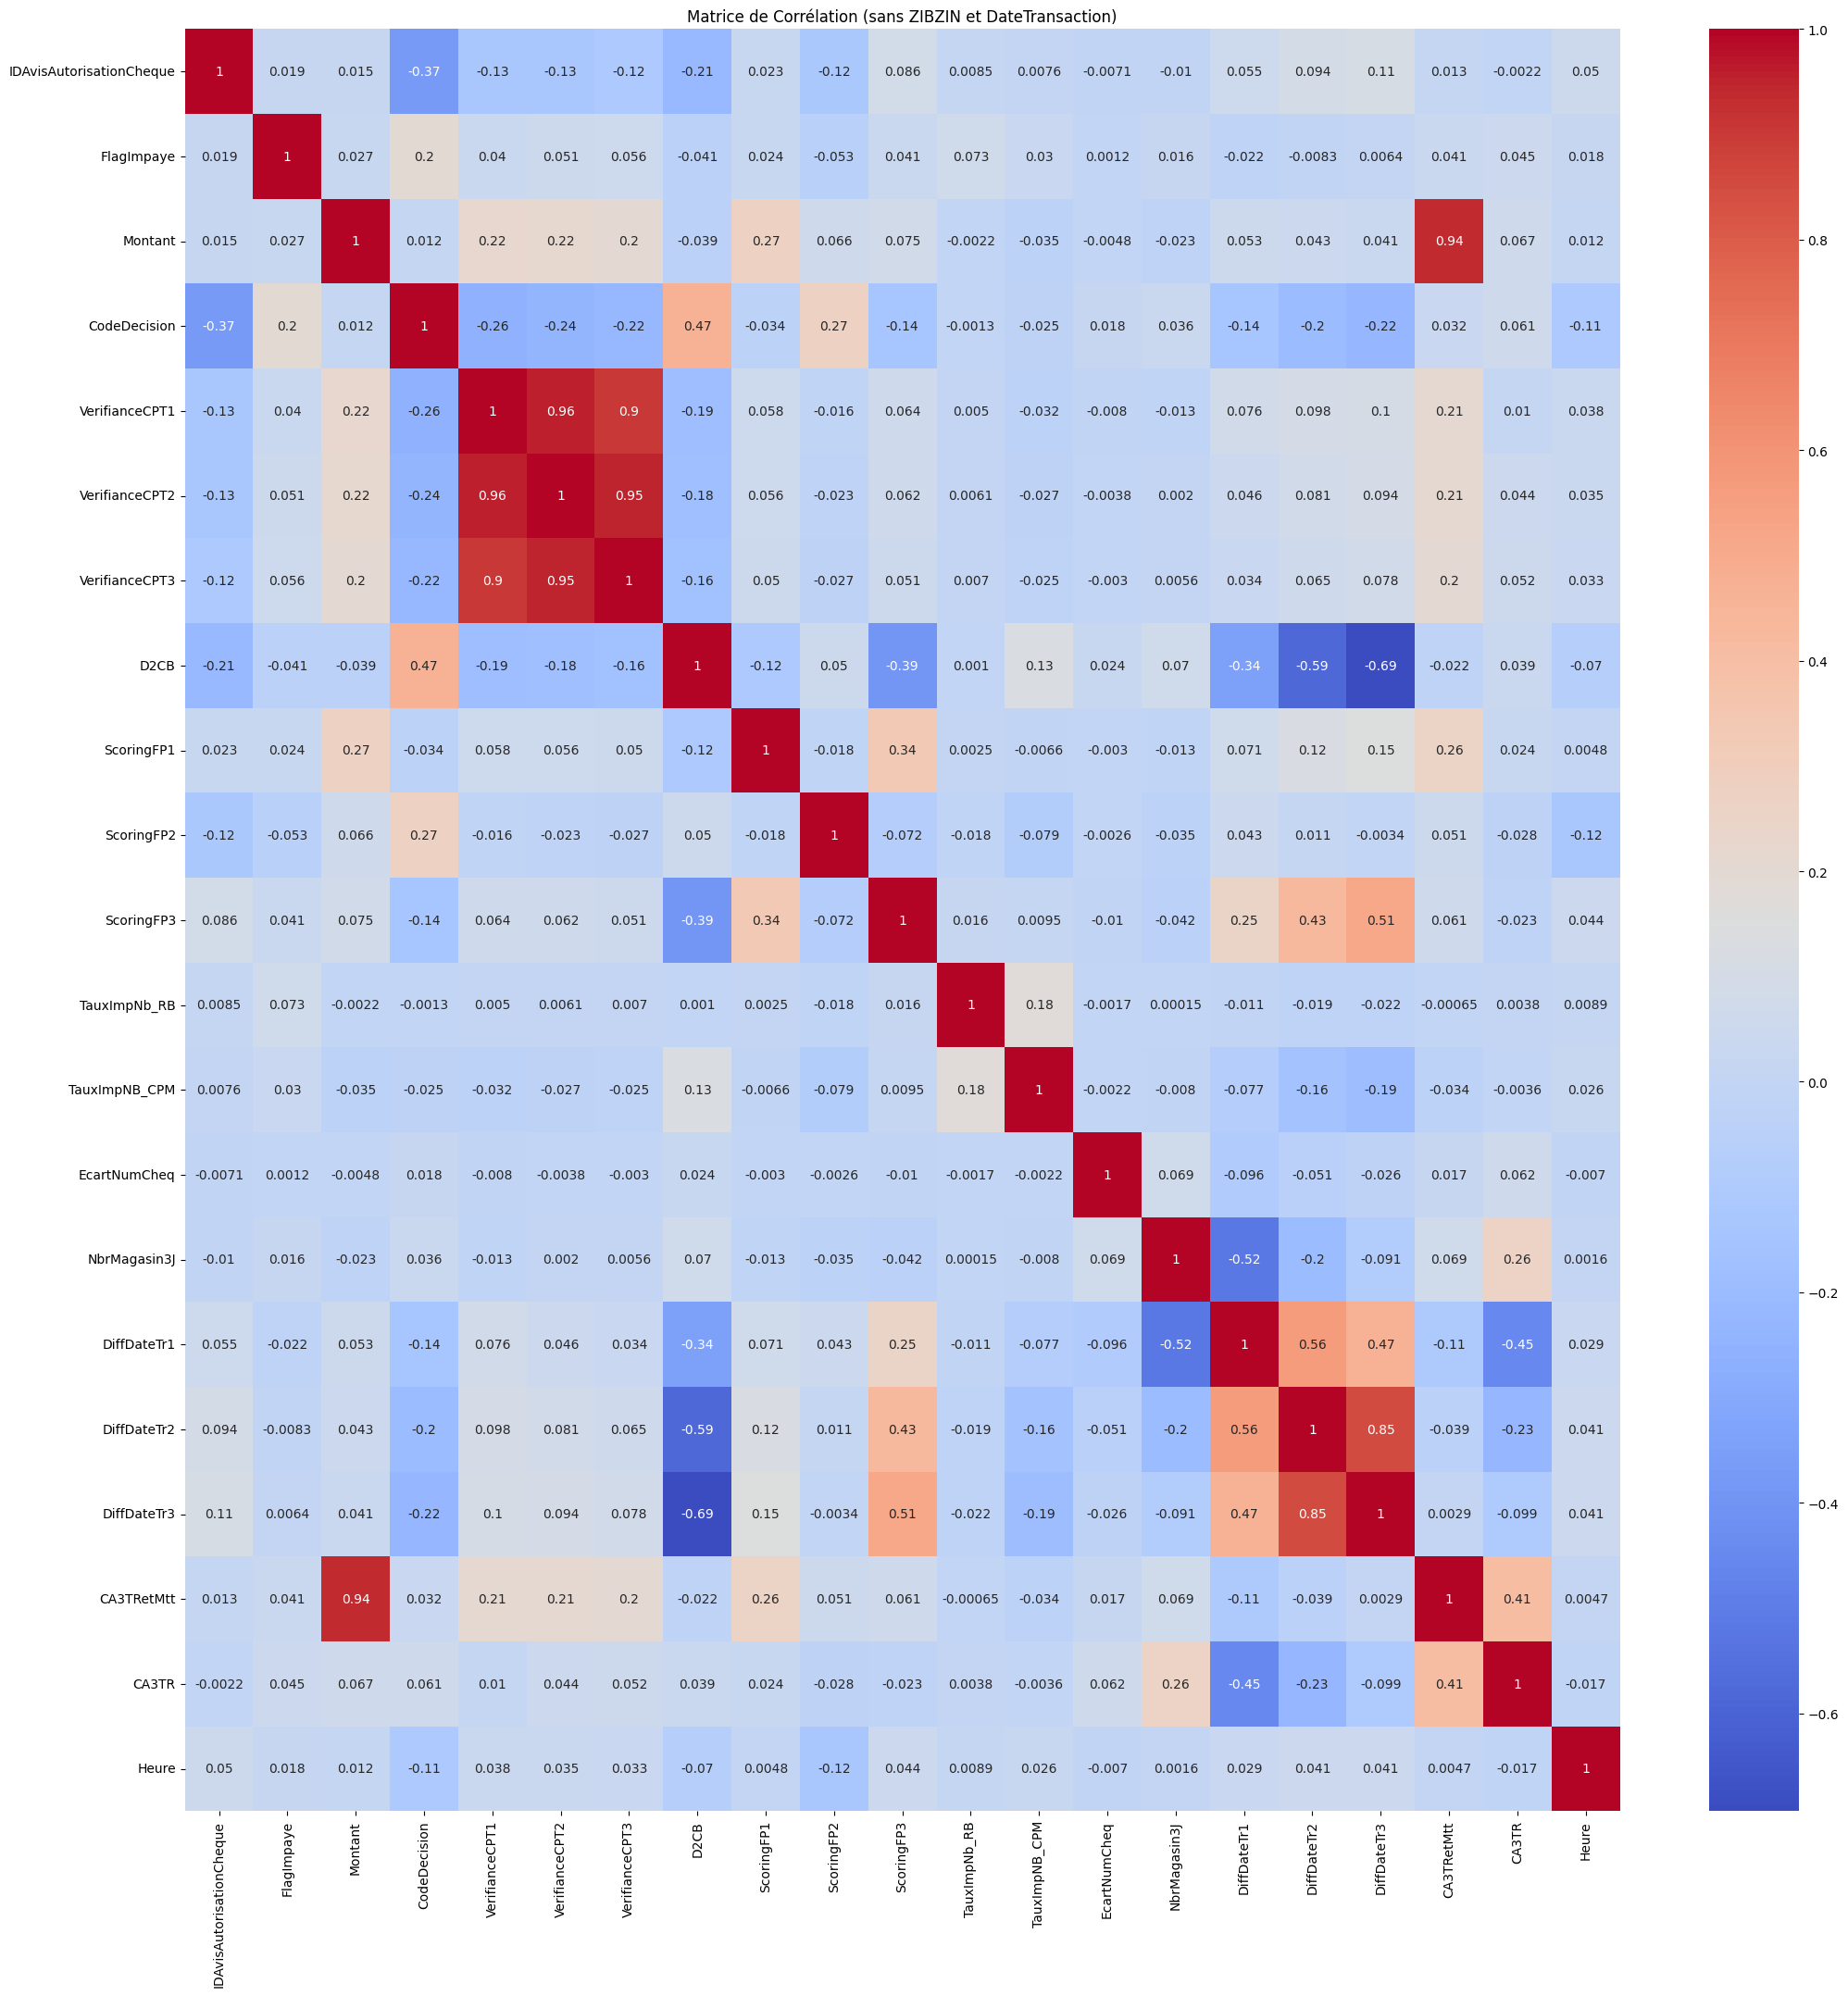

In [15]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

# Supprimer les colonnes 'ZIBZIN' et 'DateTransaction' avant de calculer la matrice de corrélation
dataMatrice = data.drop(columns=['ZIBZIN', 'DateTransaction'])

# Calculer la matrice de corrélation de Pearson
corr_matrix = dataMatrice.corr()

# Créer un heatmap de la matrice de corrélation
plt.figure(figsize=(25, 25))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Matrice de Corrélation (sans ZIBZIN et DateTransaction)')
plt.show()

### Extraire les varaible descriptives

In [23]:
# Select the variables with correlation > 0.04 with column 'target'
selected_vars = corr_matrix['FlagImpaye'][(corr_matrix['FlagImpaye'] > 0.040) | (corr_matrix['FlagImpaye'] < -0.040)].index.tolist()

# Print the selected variables
print(selected_vars)

['FlagImpaye', 'CodeDecision', 'VerifianceCPT2', 'VerifianceCPT3', 'D2CB', 'ScoringFP2', 'ScoringFP3', 'TauxImpNb_RB', 'CA3TRetMtt', 'CA3TR']


# **Application de modele de prédiction**

Définir les ensembles de données pour l'apprentissage et le test

In [7]:
from sklearn.model_selection import train_test_split

data['DateTransaction'] = pd.to_datetime(data['DateTransaction'])

# Apprentissage : transactions entre '2017-02-01' et '2017-08-31'
train_data = data[(data['DateTransaction'] >= '2017-02-01') &
                             (data['DateTransaction'] <= '2017-08-31')]

# Test : transactions entre '2017-09-01' et '2017-11-30'
test_data = data[(data['DateTransaction'] >= '2017-09-01') &
                            (data['DateTransaction'] <= '2017-11-30')]


Séparer les variables descriptives (X) et la variable cible (y)

In [8]:
X_train = train_data[['CodeDecision', 'VerifianceCPT2', 'VerifianceCPT3', 'D2CB', 'ScoringFP2', 'ScoringFP3',
                      'TauxImpNb_RB', 'CA3TRetMtt', 'CA3TR']]
y_train = train_data['FlagImpaye']

X_test = test_data[['CodeDecision', 'VerifianceCPT2', 'VerifianceCPT3', 'D2CB', 'ScoringFP2', 'ScoringFP3',
                    'TauxImpNb_RB', 'CA3TRetMtt', 'CA3TR']]
y_test = test_data['FlagImpaye']


## Modèle Random Forest

In [9]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

# Prédire sur l'ensemble de test
y_pred = rf_model.predict(X_test)

# Calculer et afficher les performances du modèle
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.4f}')
print('Classification Report:')
print(classification_report(y_test, y_pred))

Accuracy: 0.9969
Classification Report:
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00    730583
         1.0       0.98      0.66      0.79      6485

    accuracy                           1.00    737068
   macro avg       0.99      0.83      0.89    737068
weighted avg       1.00      1.00      1.00    737068



 la matrice de confusion

*   0 : La transaction est acceptée et considérée comme "normale".
*    1 : La transaction est refusée car elle est considérée comme "frauduleuse".




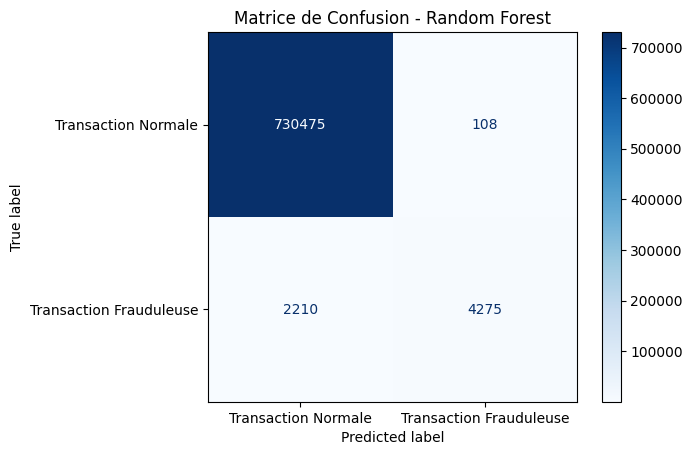

In [14]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Calcul de la matrice de confusion
cm = confusion_matrix(y_test, y_pred)

# Affichage de la matrice de confusion avec des étiquettes et une mise en forme
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Transaction Normale", "Transaction Frauduleuse"])
disp.plot(cmap='Blues')
plt.title("Matrice de Confusion - Random Forest")
plt.show()